In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense
import cv2
import os
import numpy as np

In [2]:
images = []
number_of_images = []
#load images
def load_images_from_folder(folders):
    count = 0
    for folder in folders:
        for filename in os.listdir(folder):
            img = cv2.imread(os.path.join(folder,filename))
            if img is not None:
                img = cv2.resize(img,(299,299))
                b,g,r = cv2.split(img)       # get b,g,r
                img = cv2.merge([r,g,b])     # switch it to rgb
                images.append(img)
                images.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))
                images.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE))
                images.append(cv2.rotate(img, cv2.ROTATE_180))
                images.append(cv2.flip(img, 0))
                images.append(cv2.flip(img, 1))
                images.append(cv2.flip(img, -1))
                count = count + 1 + 3 + 3
        number_of_images.append(count)
        count = 0

In [3]:
#change file path this.
foldersname = ['./images/Cobra_Crop/Tail',
               './images/KingCobra_Crop/Tail',
               './images/BandedKrait_Crop/Tail',
               './images/MalayanKrait/Tail',
               './images/MalayanPitViper/Tail',
               './images/RussellViper/Tail',
               './images/WhiteLippedPitViper_Crop/Tail',
               './images/class7/Tail',
               './images/class8/Tail',
               './images/class9/Tail',
               './images/class10/Tail',
               './images/class11/Tail',
               './images/class12/Tail',
               './images/class13/Tail'
              ]
load_images_from_folder(foldersname)

X = np.array(images)
X = tf.keras.applications.inception_v3.preprocess_input(X, data_format=None) 

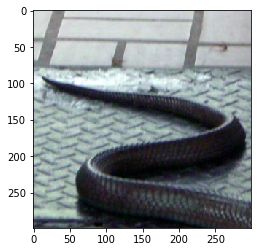

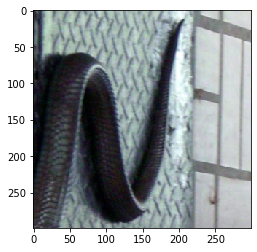

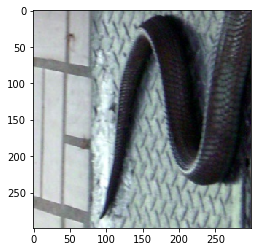

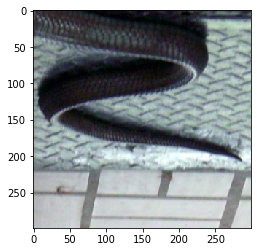

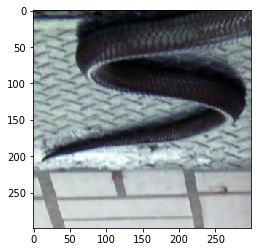

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(images[i])
    plt.figure()

In [5]:
print(number_of_images)

[364, 196, 196, 217, 126, 35, 217, 350, 70, 70, 245, 189, 98, 210]


In [6]:
#เตรียม output
def defined_output(number_of_images):
    for count,num in enumerate(number_of_images):
        for i in range(num):
            classes = len(number_of_images)
            output = np.zeros((classes,), dtype=int)
            output[count] = 1
            y.append(output)

In [7]:
y = []
defined_output(number_of_images)
y = np.array(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.layers import Dropout , GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD , RMSprop , Adadelta , Adam
from tensorflow.keras.layers import Conv2D , BatchNormalization
from tensorflow.keras.layers import MaxPooling2D

In [10]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(299,299,3))

base_model.trainable = False #Freeze Parameters

inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(14, activation='softmax')(x)

In [11]:
model = Model(inputs, predictions)

In [12]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [14]:
number_of_images

[364, 196, 196, 217, 126, 35, 217, 350, 70, 70, 245, 189, 98, 210]

In [15]:
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
46/46 [==============================] - 96s 2s/step - loss: 2.5659 - accuracy: 0.1556 - val_loss: 2.2406 - val_accuracy: 0.3785
Epoch 2/10
46/46 [==============================] - 93s 2s/step - loss: 2.2274 - accuracy: 0.2967 - val_loss: 1.9221 - val_accuracy: 0.5055
Epoch 3/10
46/46 [==============================] - 92s 2s/step - loss: 1.9818 - accuracy: 0.3479 - val_loss: 1.6656 - val_accuracy: 0.5552
Epoch 4/10
46/46 [==============================] - 93s 2s/step - loss: 1.7420 - accuracy: 0.4578 - val_loss: 1.4327 - val_accuracy: 0.6271
Epoch 5/10
46/46 [==============================] - 91s 2s/step - loss: 1.5554 - accuracy: 0.5131 - val_loss: 1.2566 - val_accuracy: 0.7017
Epoch 6/10
46/46 [==============================] - 92s 2s/step - loss: 1.3754 - accuracy: 0.5698 - val_loss: 1.1018 - val_accuracy: 0.7155
Epoch 7/10
46/46 [==============================] - 91s 2s/step - loss: 1.2504 - accuracy: 0.6024 - val_loss: 0.9827 - val_accuracy: 0.7569
Epoch 8/10
46/46 [==

In [16]:
model.predict(X_test)

array([[2.40423113e-01, 5.91936409e-01, 2.21937196e-03, ...,
        1.04152299e-02, 6.63057109e-03, 1.08212024e-01],
       [6.92807972e-01, 1.82653472e-01, 7.10270973e-03, ...,
        1.27132200e-02, 1.05406418e-02, 2.00987384e-02],
       [1.20041128e-02, 1.11408075e-02, 1.56378485e-02, ...,
        8.71209502e-01, 7.74110761e-03, 1.19240163e-02],
       ...,
       [7.37002254e-01, 2.05410853e-01, 2.76433560e-03, ...,
        2.62775831e-03, 4.36160341e-03, 1.53850233e-02],
       [1.11810805e-04, 2.31995553e-04, 9.99522861e-04, ...,
        9.53478011e-05, 2.93493387e-04, 3.75697855e-04],
       [4.88501638e-01, 1.69430733e-01, 5.36751151e-02, ...,
        2.17425134e-02, 2.56506298e-02, 1.50420889e-01]], dtype=float32)

In [17]:
model.evaluate(X_test,y_test)

25/25 [==============================] - 38s 2s/step - loss: 0.7177 - accuracy: 0.7910


[0.7176926136016846, 0.7909677624702454]

In [18]:
y_pred = model.predict(X_test)

In [19]:
def print_argmax_with_threshold(y,y_pred,threshold):
    count = 0
    for i in range(len(y_pred)):
        prob_max = np.argmax(y_pred[i])
        if(y_pred[i][prob_max] > threshold and np.argmax(y_pred[i]) == np.argmax(y[i])):
            count = count + 1
            print(y_pred[i],y[i])
    print(count,len(y_pred))

In [20]:
from sklearn.metrics import f1_score

f1_y_pred = []
for i in y_pred:
    f1_y_pred.append(np.argmax(i))
    
f1_y_test = []
for i in y_test:
    f1_y_test.append(np.argmax(i))

f1_score(f1_y_test, f1_y_pred, average='macro')

0.685627491552163

In [57]:
from sklearn.metrics import classification_report

report_y_pred = []
for i in y_pred:
    report_y_pred.append(np.argmax(i))
    
report_y_test = []
for i in y_test:
    report_y_test.append(np.argmax(i))

print(classification_report(report_y_test, report_y_pred))

              precision    recall  f1-score   support

           0       0.59      0.96      0.74       111
           1       0.78      0.30      0.43        60
           2       0.80      0.96      0.87        53
           3       0.97      0.89      0.93        66
           4       0.71      0.62      0.67        40
           5       0.00      0.00      0.00        13
           6       0.72      0.68      0.70        63
           7       0.89      0.97      0.93       108
           8       1.00      0.30      0.47        23
           9       1.00      1.00      1.00        18
          10       0.81      1.00      0.90        73
          11       0.93      0.96      0.95        56
          12       1.00      0.10      0.18        31
          13       0.86      0.83      0.85        60

    accuracy                           0.79       775
   macro avg       0.79      0.69      0.69       775
weighted avg       0.81      0.79      0.76       775



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#model.save('./model/head.h5')

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
def get_fpr_tpr_auc_threshold_for_class(y,y_pred,class_n):
    positive_class = []
    for pred in y_pred:
        positive_class.append(pred[class_n])
    positive_class = np.array(positive_class)
    new_y = []
    for i in y:
        if(np.argmax(i) == class_n):
            new_y.append(1)
        else:
            new_y.append(0)
    y = np.array(new_y)
    fpr, tpr, threshold = roc_curve(y, positive_class)
    auc = roc_auc_score(y,positive_class)
    fpr_tpr_auc_threshold = [fpr,tpr,auc,threshold]
    return fpr_tpr_auc_threshold

In [24]:
import matplotlib.pyplot as plt

In [36]:
def draw_graph(fpr_tpr_auc_threshold):
    count = 0
    plt.plot([0,1], [0,1], linestyle='--', label='Random prediction (AUROC = 0.500)')
    for i in fpr_tpr_auc_threshold:
        fpr = i[0]
        tpr = i[1]
        auc = i[2]
        plt.plot(fpr, tpr, linestyle='--', label='class '+str(count)+' prediction (AUROC = %0.3f)' % auc)
        count = count + 1
        
    # Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()

In [26]:
fpr_tpr_auc_threshold = []
for i in range(14): #predict 14 class
    fpr_tpr_auc_threshold.append(get_fpr_tpr_auc_threshold_for_class(y_test,y_pred,i))

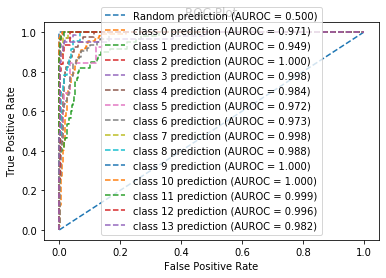

In [37]:
draw_graph(fpr_tpr_auc_threshold)

In [45]:
import math

In [53]:
count = 0
best_threshold = []
for i in fpr_tpr_auc_threshold:
    max = 0
    bt = 0
    for n in range(len(i[0])):
#         if(i[1][n] > 0.80):
#             print('class '+str(count)+': fpr = ',i[0][n],'tpr = ',i[1][n],'threshold = ',i[3][n])
        if(math.sqrt(i[1][n] * (1-i[0][n])) > max): #i[1][n] - i[0][n]
            max = math.sqrt(i[1][n] * (1-i[0][n]))
            bt = i[3][n]
    best_threshold.append(bt)
    #next round
    bt = 0
    max = 0
    count = count + 1

In [ ]:
"""
https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
"""

In [54]:
best_threshold

[0.2979454,
 0.10237421,
 0.28511912,
 0.16435443,
 0.071139306,
 0.014137184,
 0.13095357,
 0.35886973,
 0.046168353,
 0.5185037,
 0.39973196,
 0.21394502,
 0.06723306,
 0.2271852]

In [29]:
#model.save('./model/body/body_v2.h5')
#model.save('./model/head/head_v2.h5')
#model.save('./model/mid/mid_v2.h5')
#model.save('./model/tail/tail_v2.h5')

In [33]:
for i in y_pred[172]:
    print(i)

0.54046047
0.12407213
0.00732755
0.011043171
0.023301339
0.008640755
0.0065878206
0.0033828118
0.012684281
0.005451889
0.05562173
0.009199768
0.091775455
0.10045085


In [34]:
y_test[172]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
from sklearn.metrics import confusion_matrix

conf_y_pred = []
for i in y_pred:
    conf_y_pred.append(np.argmax(i))
    
conf_y_test = []
for i in y_test:
    conf_y_test.append(np.argmax(i))
    
conf = confusion_matrix(conf_y_test,conf_y_pred)
print(conf)

[[107   1   0   0   0   0   0   0   0   0   2   0   0   1]
 [ 37  18   3   1   0   0   1   0   0   0   0   0   0   0]
 [  0   0  51   0   0   0   0   0   0   0   0   2   0   0]
 [  1   0   5  59   0   0   0   0   0   0   0   1   0   0]
 [ 10   3   0   0  25   0   1   0   0   0   1   0   0   0]
 [  4   0   0   0   8   0   0   0   0   0   0   1   0   0]
 [  1   0   0   0   0   0  43  13   0   0   6   0   0   0]
 [  0   0   0   0   0   0   3 105   0   0   0   0   0   0]
 [  0   0   0   0   1   0  10   0   7   0   4   0   0   1]
 [  0   0   0   0   0   0   0   0   0  18   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  73   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0  54   0   0]
 [ 11   1   4   1   1   0   0   0   0   0   4   0   3   6]
 [  7   0   1   0   0   0   2   0   0   0   0   0   0  50]]


# Test Model

In [58]:
#load model
model_body = tf.keras.models.load_model('./model/body/body_v2.h5')
model_head = tf.keras.models.load_model('./model/head/head_v2.h5')
model_mid = tf.keras.models.load_model('./model/mid/mid_v2.h5')
model_tail = tf.keras.models.load_model('./model/tail/tail_v2.h5')

In [60]:
model_body.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

# Body

In [73]:
foldersname = ['./images/Cobra_Crop/Body',
               './images/KingCobra_Crop/Body',
               './images/BandedKrait_Crop/Body',
               './images/MalayanKrait/Body',
               './images/MalayanPitViper/Body',
               './images/RussellViper/Body',
               './images/WhiteLippedPitViper_Crop/Body',
               './images/class7/Body',
               './images/class8/Body',
               './images/class9/Body',
               './images/class10/Body',
               './images/class11/Body',
               './images/class12/Body',
               './images/class13/Body'
              ]
number_of_images = []
images = []
load_images_from_folder(foldersname)

X = np.array(images)
X = tf.keras.applications.inception_v3.preprocess_input(X, data_format=None)

y = []
defined_output(number_of_images)
y = np.array(y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = model_body.predict(X)

In [74]:
from sklearn.metrics import f1_score

f1_y_pred = []
for i in y_pred:
    f1_y_pred.append(np.argmax(i))
    
f1_y = []
for i in y:
    f1_y.append(np.argmax(i))

print('f1 score = ',f1_score(f1_y, f1_y_pred, average='macro'))

f1 score =  0.9295895132597038


In [75]:
report_y_pred = []
for i in y_pred:
    report_y_pred.append(np.argmax(i))
    
report_y = []
for i in y:
    report_y.append(np.argmax(i))

print(classification_report(report_y, report_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       490
           1       0.88      0.64      0.74       350
           2       0.99      0.99      0.99       259
           3       0.94      0.99      0.96       336
           4       0.98      0.98      0.98       259
           5       0.96      0.98      0.97       112
           6       0.85      0.67      0.75       308
           7       0.88      0.97      0.92       910
           8       0.99      0.94      0.96       203
           9       0.99      1.00      1.00       315
          10       0.98      1.00      0.99       980
          11       0.99      1.00      0.99       798
          12       0.98      0.92      0.95       112
          13       0.98      0.95      0.97       238

    accuracy                           0.94      5670
   macro avg       0.94      0.92      0.93      5670
weighted avg       0.94      0.94      0.93      5670



In [76]:
fpr_tpr_auc_threshold = []
for i in range(14): #predict 14 class
    fpr_tpr_auc_threshold.append(get_fpr_tpr_auc_threshold_for_class(y,y_pred,i))

In [77]:
count = 0
best_threshold = []
for i in fpr_tpr_auc_threshold:
    max = 0
    bt = 0
    for n in range(len(i[0])):
#         if(i[1][n] > 0.80):
#             print('class '+str(count)+': fpr = ',i[0][n],'tpr = ',i[1][n],'threshold = ',i[3][n])
        if(math.sqrt(i[1][n] * (1-i[0][n])) > max): #i[1][n] - i[0][n]
            max = math.sqrt(i[1][n] * (1-i[0][n]))
            bt = i[3][n]
    best_threshold.append(bt)
    #next round
    bt = 0
    max = 0
    count = count + 1
print(best_threshold)

[0.1632643, 0.10277324, 0.4527693, 0.18877168, 0.34674576, 0.32155967, 0.06916505, 0.39951608, 0.041779608, 0.42629862, 0.31490856, 0.4795222, 0.088918656, 0.13018343]


# Head

In [78]:
foldersname = ['./images/Cobra_Crop/Head',
               './images/KingCobra_Crop/Head',
               './images/BandedKrait_Crop/Head',
               './images/MalayanKrait/Head',
               './images/MalayanPitViper/Head',
               './images/RussellViper/Head',
               './images/WhiteLippedPitViper_Crop/Head',
               './images/class7/Head',
               './images/class8/Head',
               './images/class9/Head',
               './images/class10/Head',
               './images/class11/Head',
               './images/class12/Head',
               './images/class13/Head'
              ]
number_of_images = []
images = []
load_images_from_folder(foldersname)

X = np.array(images)
X = tf.keras.applications.inception_v3.preprocess_input(X, data_format=None)

y = []
defined_output(number_of_images)
y = np.array(y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = model_body.predict(X)

In [81]:
from sklearn.metrics import f1_score

f1_y_pred = []
for i in y_pred:
    f1_y_pred.append(np.argmax(i))
    
f1_y = []
for i in y:
    f1_y.append(np.argmax(i))

print('f1 score = ',f1_score(f1_y, f1_y_pred, average='macro'))

f1 score =  0.5166756050574308


In [82]:
report_y_pred = []
for i in y_pred:
    report_y_pred.append(np.argmax(i))
    
report_y = []
for i in y:
    report_y.append(np.argmax(i))

print(classification_report(report_y, report_y_pred))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       511
           1       0.50      0.59      0.54       350
           2       0.79      0.23      0.36       231
           3       0.41      0.08      0.14       322
           4       0.82      0.53      0.65       252
           5       0.59      0.70      0.64       112
           6       0.20      0.00      0.01       322
           7       0.70      0.97      0.81       945
           8       0.95      0.20      0.34       196
           9       0.76      0.91      0.83       315
          10       0.77      0.96      0.85       980
          11       0.70      0.98      0.82       798
          12       0.43      0.12      0.18        77
          13       0.83      0.29      0.42       217

    accuracy                           0.69      5628
   macro avg       0.65      0.52      0.52      5628
weighted avg       0.67      0.69      0.64      5628



In [83]:
fpr_tpr_auc_threshold = []
for i in range(14): #predict 14 class
    fpr_tpr_auc_threshold.append(get_fpr_tpr_auc_threshold_for_class(y,y_pred,i))

In [84]:
count = 0
best_threshold = []
for i in fpr_tpr_auc_threshold:
    max = 0
    bt = 0
    for n in range(len(i[0])):
#         if(i[1][n] > 0.80):
#             print('class '+str(count)+': fpr = ',i[0][n],'tpr = ',i[1][n],'threshold = ',i[3][n])
        if(math.sqrt(i[1][n] * (1-i[0][n])) > max): #i[1][n] - i[0][n]
            max = math.sqrt(i[1][n] * (1-i[0][n]))
            bt = i[3][n]
    best_threshold.append(bt)
    #next round
    bt = 0
    max = 0
    count = count + 1
print(best_threshold)

[0.13328303, 0.15605548, 0.011606576, 0.0027181276, 0.01757414, 0.04084673, 0.007108541, 0.32437485, 0.012789588, 0.07400884, 0.3397821, 0.5817404, 0.008231853, 0.031473454]


# Mid

In [85]:
foldersname = ['./images/Cobra_Crop/Mid',
               './images/KingCobra_Crop/Mid',
               './images/BandedKrait_Crop/Mid',
               './images/MalayanKrait/Mid',
               './images/MalayanPitViper/Mid',
               './images/RussellViper/Mid',
               './images/WhiteLippedPitViper_Crop/Mid',
               './images/class7/Mid',
               './images/class8/Mid',
               './images/class9/Mid',
               './images/class10/Mid',
               './images/class11/Mid',
               './images/class12/Mid',
               './images/class13/Mid'
              ]
number_of_images = []
images = []
load_images_from_folder(foldersname)

X = np.array(images)
X = tf.keras.applications.inception_v3.preprocess_input(X, data_format=None)

y = []
defined_output(number_of_images)
y = np.array(y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = model_body.predict(X)

MemoryError: Unable to allocate 5.36 GiB for an array with shape (5369, 299, 299, 3) and data type float32

In [86]:
len(X)

5369

In [87]:
images

[array([[[138, 141, 156],
         [134, 139, 152],
         [125, 136, 146],
         ...,
         [102,  93,  77],
         [101,  94,  76],
         [102,  95,  77]],
 
        [[134, 139, 152],
         [129, 137, 148],
         [121, 130, 140],
         ...,
         [102,  95,  79],
         [103,  96,  79],
         [103,  96,  78]],
 
        [[123, 134, 143],
         [121, 132, 141],
         [114, 125, 132],
         ...,
         [104,  97,  81],
         [103,  97,  80],
         [102,  96,  79]],
 
        ...,
 
        [[153, 142, 129],
         [154, 144, 131],
         [155, 146, 132],
         ...,
         [140, 127, 119],
         [139, 127, 120],
         [136, 125, 118]],
 
        [[163, 155, 139],
         [163, 155, 139],
         [164, 155, 139],
         ...,
         [141, 127, 119],
         [140, 127, 119],
         [137, 124, 116]],
 
        [[175, 168, 150],
         [172, 166, 148],
         [171, 163, 146],
         ...,
         [142, 128, 120],
  